# Inference

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Matrix Multiply

In [2]:
W1 = np.random.randn(2,4)  # weight: 2 x 4 matrix
b1 = np.random.randn(4)    # bias: 1 x 4 vector
x = np.random.randn(10,2)  # input: N x 2 matrix
h = np.dot(x, W1) + b1

In [3]:
print("Input:")
print(x)
print("Hidden:")
print(h)

Input:
[[ 0.31719143 -0.35033051]
 [-1.58059797  1.44754231]
 [ 0.44068965  0.37369799]
 [ 0.65636898  0.14147381]
 [-0.53938245  0.20126452]
 [ 0.60912839 -0.52009345]
 [-1.00939863 -1.75688682]
 [-1.1366599  -1.30483208]
 [ 0.7724065   0.12782597]
 [ 0.17147725 -0.18205193]]
Hidden:
[[ 0.12630856  1.18096659  0.99729777 -0.28619586]
 [-3.78906646  2.90163171  2.73923292  0.97796861]
 [-0.1098207   1.38517739  1.16803793 -0.81829687]
 [ 0.35143834  1.17913879  0.96064647 -0.94704337]
 [-1.48921228  1.85989265  1.69573904  0.42339087]
 [ 0.66626739  0.9564295   0.76541397 -0.53778808]
 [-1.05599297  1.38247645  1.31528526  2.02198963]
 [-1.51204765  1.62248501  1.5440731   1.92945673]
 [ 0.53463749  1.11012784  0.88666174 -1.07583599]
 [-0.19196724  1.32444824  1.14125899 -0.20530431]]


## Activation Function / Non-linear Capability

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
_x = np.arange(-8,9,0.5)
_y = sigmoid(_x)

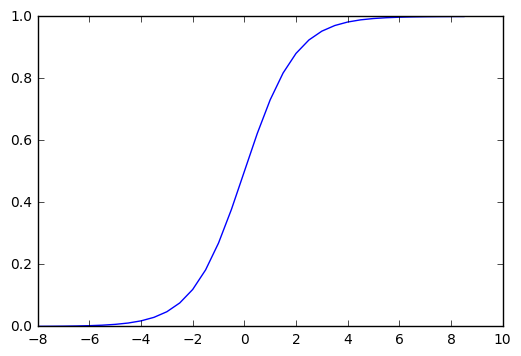

In [6]:
plt.plot(_x, _y)
plt.show()

In [7]:
sigmoid(h)

array([[0.53153523, 0.76512155, 0.73052696, 0.42893544],
       [0.0221165 , 0.94792704, 0.93930238, 0.72670496],
       [0.47257239, 0.79982123, 0.76279018, 0.30612531],
       [0.58696633, 0.76479292, 0.72325122, 0.27947981],
       [0.18403999, 0.86528444, 0.84497741, 0.60429437],
       [0.66066686, 0.72240636, 0.68252801, 0.36870228],
       [0.25807595, 0.79938843, 0.78839623, 0.88308658],
       [0.18063553, 0.83513756, 0.82405605, 0.87318928],
       [0.63056408, 0.75215294, 0.70820079, 0.25429483],
       [0.45215503, 0.78992083, 0.75791072, 0.44885345]])

## Simple Double Layers Dense Neural Network 

In [8]:
x = np.random.randn(10, 2)   # input: 10 x 2 matrix, 10: data count, 2: dimension
W1 = np.random.randn(2, 4)   # weight_1: 2 x 4 matrix, 2: data dimension, 4: node count in the hidden layer
b1 = np.random.randn(4)      # bias_1: (4,) vector
W2 = np.random.randn(4, 3)   # weight_2: 4 x 3 matrix, 4: node count in the hidden layer
b2 = np.random.randn(3)      # bias_2: (3,) vector

h = np.dot(x, W1) + b1       # 10 x 4
a = sigmoid(h)               # 10 x 4
s = np.dot(a, W2) + b2       # 10 x 3

In [9]:
print(s)

[[ 2.49013472e-02  3.38842531e-01  8.93817305e-02]
 [-8.37859196e-02  5.08259328e-01 -3.89553512e-01]
 [ 5.26030606e-01 -7.11120155e-01  8.31766177e-02]
 [ 6.84293521e-01 -7.34397436e-01  2.73150911e-01]
 [ 5.66212676e-02 -2.18770215e-02 -1.94014518e-02]
 [-6.79998944e-03  3.26580197e-01  2.57332450e-04]
 [ 8.27190415e-02  2.20485263e-03  1.17770544e-01]
 [ 3.84548533e-02 -1.83100033e-02 -1.13458325e-01]
 [ 7.63119764e-02  1.39921249e-01  2.04267853e-01]
 [-2.97581447e-02  5.28949158e-01 -9.99762092e-02]]


## A Simple Two Layer Neural Network

In [10]:
class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        out = 1.0 / (1.0 + np.exp(-x))
        return out

In [11]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [12]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # initialize weights and biases for each layer
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # generate each layer
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # concatenate all weights into a list
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [13]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [14]:
print(s)

[[-1.5660078   0.5614548  -1.01340762]
 [-1.6695416   0.49612605 -1.06076665]
 [-0.60960045  0.68072182 -0.80469953]
 [-0.36140379  1.01393921 -0.59717561]
 [-1.1976962   0.91585662 -0.74518972]
 [ 0.09175663 -0.43702425 -1.24069424]
 [-0.42097402  0.68062482 -0.77489736]
 [-0.85625715  1.20083298 -0.41060975]
 [-1.30019354  0.509659   -1.00166284]
 [-1.30850614  0.64201668 -0.93306883]]


# Learning

## Softmax

$$y_k = \frac{exp(s_i)}{\sum^{n}_{i=1}exp(s_i)}$$

## Loss Function : Cross Entropy

* For a single data.

$$L = -\sum_{k}t_{k}log_{e}y_{k}$$

* For a mini-batch dataset
$$L = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}log_{e}y_{nk}$$

In [15]:
def Softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.mean(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T
    else:
        # ndim == 1
        x = x - np.mean(x)
        return np.exp(x) / np.sum(np.exp(x))

In [16]:
def Cross_Entropy_Error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    if t.size == y.size:
        t = t.argmax(axis=1)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [17]:
_y = Softmax(np.random.randn(10))
_t = np.array([1] + [0]*9)
Cross_Entropy_Error(_y, _t)

2.18317110042923

In [18]:
def SoftmaxWithLoss(y, t):
    y_ = Softmax(y)
    l_ = Cross_Entropy_Error(y_, t)
    return l_

In [19]:
y_ = np.random.randn(10)
t_ = np.array([0]*2 + [1] + [0]*7)
SoftmaxWithLoss(y_, t_)

1.0715834875816794

## Differential vs. Gradient

$$\frac{\partial{L}}{\partial{W}} = \begin{bmatrix}
\frac{\partial{L}}{\partial{W_{11}}} & \frac{\partial{L}}{\partial{W_{12}}} & \dots & \frac{\partial{L}}{\partial{W_{1n}}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial{L}}{\partial{W_{m1}}} & \frac{\partial{L}}{\partial{W_{m2}}} & \dots & \frac{\partial{L}}{\partial{W_{mn}}}
\end{bmatrix}$$

## Chain Rule vs. Back Propagation

Assume $y = f(x)$ and $z = g(y)$, that is $z = g(f(x))$.
Calculate $\frac{\partial{z}}{\partial{x}}$ ?

**Chain Rule**:
So, $\frac{\partial{z}}{\partial{x}} = \frac{\partial{z}}{\partial{y}}\frac{\partial{y}}{\partial{x}}$

**Back Propagation**:
Assume there are two layers in network, then $\frac{\partial{z}}{\partial{y}}$ is the final network layer, $\frac{\partial{y}}{\partial{x}}$ is the first network layer.


## Graph: Repeat Node in Back Propagation (same data to different tasks)

In [20]:
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

In [21]:
y

array([[ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218],
       [ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218],
       [ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218],
       [ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218],
       [ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218],
       [ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218],
       [ 1.47718005,  1.19647799, -1.51013273,  0.03141061,  1.51608427,
        -0.03859753,  1.54006147, -0.33741218]])

In [22]:
dy = np.random.randn(N, D)
dx = np.sum(dy, axis=0, keepdims=True)

In [23]:
dx

array([[ 3.51603162, -0.96025729, -1.94263772,  1.02929744, -1.26039361,
        -3.02640952,  2.02077802,  6.17912444]])

## Graph: Sum Node in Back Propagation (is opposite to Repeat Node)

In [24]:
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)   # forward

In [25]:
y

array([[-1.0773302 , -4.20331002,  1.29637286,  4.39158553, -4.89622415,
         0.35559169,  0.10799764,  0.93340163]])

In [26]:
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)  # backward

In [27]:
dx

array([[-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086],
       [-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086],
       [-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086],
       [-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086],
       [-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086],
       [-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086],
       [-0.15513489,  1.08836002,  1.10749073,  0.40834269, -0.06140554,
         1.30490839, -1.79837753,  0.48382086]])

## MatMul in Back Propagation

In [28]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW   # deep copy
        return dx

## Sigmoid in Back Propagation

$$Sigmoid = y = \frac{1}{1+exp(-x)}$$
$$\frac{\partial{y}}{\partial{x}} = y*(1-y)$$

In [29]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        self.out = 1 / (1 + np.exp(-x))
        return self.out
    
    def backward(self, dout):
        dx = dout * self.out * (1 - self.out)
        return dx

## Affine in Back Propagation

In [30]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
    
    def forward(self, x):
        W, b = self.params
        self.x = x
        return np.dot(x, W) + b
    
    def backward(self, dout):
        # Affine backward
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

## SoftmaxWithLoss in Back Propagation

In [31]:
class SoftmaxWithLoss:
    def __softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.mean(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T
        else:
            # ndim == 1
            x = x - np.mean(x)
            return np.exp(x) / np.sum(np.exp(x))        
    
    def __cross_entropy_error(self, y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        if t.size == y.size:
            t = t.argmax(axis=1)

        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size        
    
    def __init__(self):
        self.y, self.t = None, None
    
    def forward(self, x, t):
        self.t = t
        self.y = self.__softmax(x)
        
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
        
        _l = self.__cross_entropy_error(self.y, self.t)
        return _l
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        
        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size
        
        return dx

## Updating Weights

In [32]:
class SGD:
    def __init__(self, lr=1e-2):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            # notice matrix calculation, must use -=
            params[i] -= self.lr*grads[i]

# Example

## Generating A Dataset

In [33]:
def load_data(seed=1988):
    np.random.seed(seed)
    N = 100
    DIM = 2
    CLS_NUM = 3
    
    x = np.zeros((N*CLS_NUM, DIM))   # (300, 2)
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)   # (300, 3)
    
    for j in range(CLS_NUM):
        for i in range(N):
            rate = i / N
            radius = 1.0 * rate
            theta = j*4.0 + 4.0*rate + np.random.randn() * 0.2
            
            ix = N*j + i
            x[ix] = np.array([radius * np.sin(theta), radius * np.cos(theta)]).flatten()
            
            t[ix, j] = 1
            
    return x, t

In [34]:
x, t = load_data()

In [35]:
print(x.shape, t.shape)

(300, 2) (300, 3)


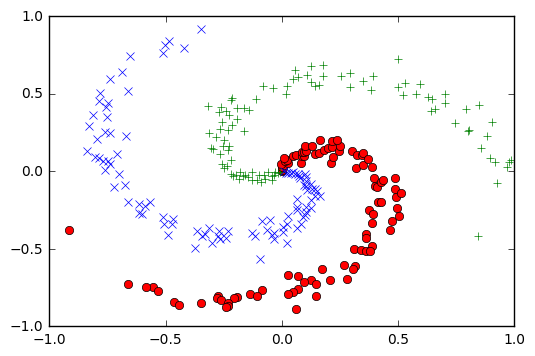

In [36]:
plt.plot(x[:100,0], x[:100,1], 'ro')
plt.plot(x[101:200,0], x[101:200,1], 'g+')
plt.plot(x[201:300,0], x[201:300,1], 'bx')
plt.show()

## Build a Neural Network

In [37]:
class TwoLayerNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # weight and bias initialization
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # layers in the network
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # saving all weights and grads
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
        
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        # here we take loss as the result returned
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        # notice here is reversed order
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

## Starting Training

In [38]:
# hyperparameters
max_epoch = 301
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# load the dataset
x, t = load_data()

# generate model and optimizer
model = TwoLayerNeuralNetwork(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# learning
data_size = len(x)
iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

# start learning
for epoch in range(max_epoch):
    # data preprocessing
    idx = np.random.permutation(data_size)
    _x = x[idx]
    _t = t[idx]
    
    for it in range(iters):
        batch_x = _x[it*batch_size:(it+1)*batch_size]
        batch_t = _t[it*batch_size:(it+1)*batch_size]
        
        # calculate loss and update the parameters
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
    if epoch % 2 == 0:
        avg_loss = total_loss / loss_count
        if epoch % 10 == 0: print("epoch {}: average loss {}".format(epoch, avg_loss))
        loss_list.append(avg_loss)
        total_loss, loss_count = 0, 0

epoch 0: average loss 1.1498947735655973
epoch 10: average loss 1.153357032859678
epoch 20: average loss 0.8530677692632324
epoch 30: average loss 0.7636921642603046
epoch 40: average loss 0.7517867482915448
epoch 50: average loss 0.7469596597609496
epoch 60: average loss 0.7321557877814673
epoch 70: average loss 0.6865837345939918
epoch 80: average loss 0.6233020646502412
epoch 90: average loss 0.54763921103511
epoch 100: average loss 0.4794548676144861
epoch 110: average loss 0.41985262981430777
epoch 120: average loss 0.37700560611434714
epoch 130: average loss 0.329048620046014
epoch 140: average loss 0.307821235768467
epoch 150: average loss 0.2771438447427136
epoch 160: average loss 0.2640813783493254
epoch 170: average loss 0.24143930970978852
epoch 180: average loss 0.22618857818675525
epoch 190: average loss 0.21713875560181384
epoch 200: average loss 0.2013352824061784
epoch 210: average loss 0.1941447352997256
epoch 220: average loss 0.1822205481860252
epoch 230: average los

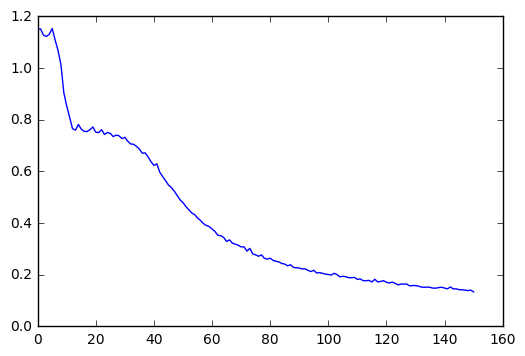

In [39]:
plt.plot(loss_list)
plt.show()

## Decision Boundary

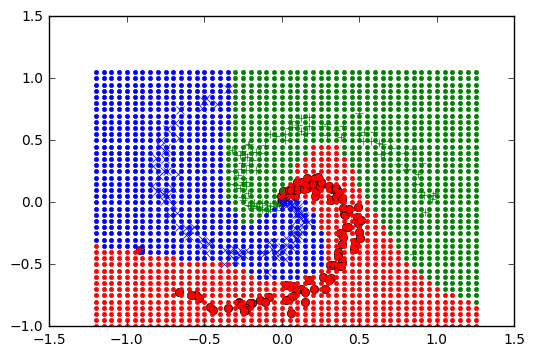

In [40]:
xx, yy = np.meshgrid(np.arange(-1.2, 1.3, 0.05), np.arange(-1.0, 1.1, 0.05))
x_list, y_list = [], []

for _x, _y in zip(xx, yy):
    for px, py in zip(_x, _y):
        x_list.append(px)
        y_list.append(py)
d = np.array([x_list, y_list]).T
z_list = model.predict(d)
z_list = z_list.argmax(axis=1)

plt.plot(x[:100,0], x[:100,1], 'ro')
plt.plot(x[101:200,0], x[101:200,1], 'g+')
plt.plot(x[201:300,0], x[201:300,1], 'bx')

for _x, _y, _z in zip(x_list, y_list, z_list):
    if _z == 0:
        plt.plot(_x, _y, 'r.')
    elif _z == 1:
        plt.plot(_x, _y, 'g.')
    elif _z == 2:
        plt.plot(_x, _y, 'b.')

plt.show()

## Using Trainer

Here we use high-level API to start a training.

In [42]:
from common.trainer import Trainer

In [43]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [44]:
x, t = load_data()
model = TwoLayerNeuralNetwork(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.05
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.02
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.95
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.88
| epoch 2

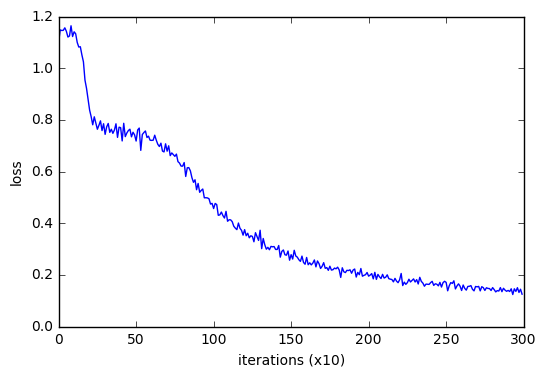

In [45]:
trainer = Trainer(model=model, optimizer=optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()